In [1]:
import numpy as np
from random import choice

import matplotlib.pyplot as plt
#creating 3 doors, a car and 2 goats
doors=(range(3))
prize=['car','goat','goat']

#creating 3 players and a dictionary where the number of victories is saved
players=['Conservative','Switcher','Newcomer']
winner={player:0 for player in players}

#simulating one try, every time a random door is chosen, then a door is opened and the switcher 
for i in players:
    chosen=choice(doors)
    opened=choice([x for x in doors if x!=chosen and prize[x]!='car'])
    if(i=='Switcher'):
        chosen=choice([x for x in doors if x!=chosen and x!=opened])
    elif(i=='Newcomer'):
        chosen=choice([x for x in doors if x!=opened])
    
    print(i, 'has chosen a', prize[chosen])
    if(prize[chosen]=='car'):
        winner[i]+=1
print(winner)
    
    

Conservative has chosen a goat
Switcher has chosen a car
Newcomer has chosen a car
{'Conservative': 0, 'Switcher': 1, 'Newcomer': 1}


In [2]:
#repeating the experiment N time
N=100000

winner={player:0 for player in players}

for j in range(N):
    for i in players:
        chosen=choice(doors)
        opened=choice([x for x in doors if x!=chosen and prize[x]!='car'])
        if(i=='Switcher'):
            chosen=choice([x for x in doors if x!=chosen and x!=opened])
        elif(i=='Newcomer'):
            chosen=choice([x for x in doors if x!=opened])

        if(prize[chosen]=='car'):
            winner[i]+=1
print(winner)
#Transforming the number of wins into winning probability
for i in players:
    winner[i]=winner[i]/N*100
#Printing the result
print(f'The best option is {max(winner)} with a {winner[max(winner)]:.2f}% winning ratio')

{'Conservative': 33369, 'Switcher': 66847, 'Newcomer': 50060}
The best option is Switcher with a 66.85% winning ratio


In [3]:
from random import sample
#Doing the same with tot doors and opening p doors every time
def Monty_Hall_Sim(N,N_doors,p):
    #creating 3 doors, a car and 2 goats
    doors=(range(N_doors))
    prize=['car']+['goat']*(len(doors)-1)

    #creating 3 players and a dictionary where the number of victories is saved
    players=['Conservative','Switcher','Newcomer']
    winner={player:0 for player in players}

    for j in range(N):
        for i in players:
            chosen=choice(doors)
            opened=sample([x for x in doors if x!=chosen and prize[x]!='car'],p)
            if(i=='Switcher'):
                chosen=choice([x for x in doors if x!=chosen and x not in opened])
            elif(i=='Newcomer'):
                chosen=choice([x for x in doors if x not in opened])

            if(prize[chosen]=='car'):
                winner[i]+=1

    return{player: winner[player]/N for player in players}

# Trying to see if the function works correctly
N=10000
N_doors=3
p=1         # Number of doors opened
results=Monty_Hall_Sim(N,N_doors,p)
print(results)

{'Conservative': 0.3392, 'Switcher': 0.6638, 'Newcomer': 0.5006}


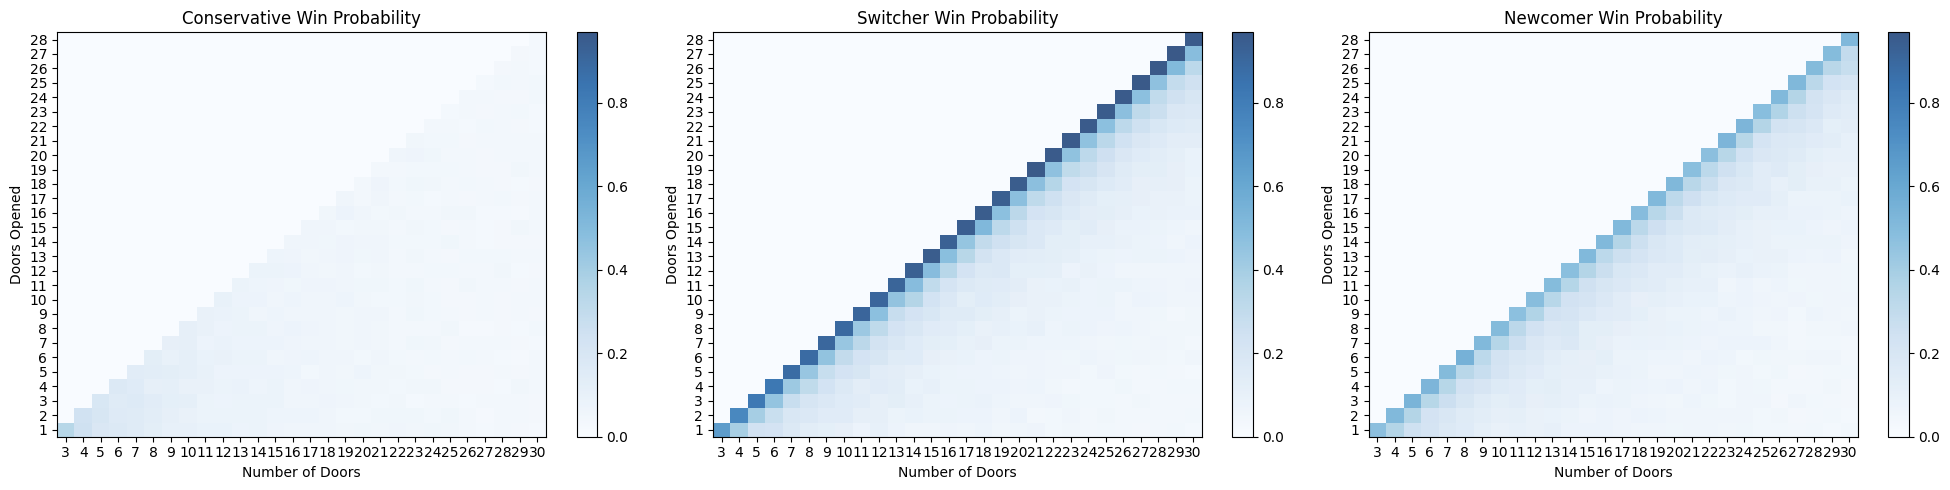

In [4]:
import matplotlib.pyplot as plt
# Creating a heatmap to plot visually how the probabilities scale as a function of the 
def generate_heatmaps(N=1000, N_doors_values=np.array(range(3, 31)), p_range=np.array(range(1, 29))):

    heatmap_data = {player: np.zeros((len(p_range), len(N_doors_values))) for player in ['Conservative', 'Switcher', 'Newcomer']}
    
    for i, N_doors in enumerate(N_doors_values):
        mask = np.less(p_range,N_doors-1)
        for j, p in enumerate(p_range[mask]):
            results = Monty_Hall_Sim(N, N_doors, p)
            for player in results:
                heatmap_data[player][j, i] = results[player]
    
    vmin = min(np.min(heatmap_data[player]) for player in heatmap_data)
    vmax = max(np.max(heatmap_data[player]) for player in heatmap_data)
    
    colormaps = {'Conservative': 'Blues', 'Switcher': 'Blues', 'Newcomer': 'Blues'}
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    for ax, player in zip(axes, ['Conservative', 'Switcher', 'Newcomer']):
        c = ax.imshow(heatmap_data[player], aspect='auto', origin='lower', cmap=colormaps[player], alpha=0.8, vmin=vmin, vmax=vmax)
        ax.set_title(f'{player} Win Probability')
        ax.set_xlabel('Number of Doors')
        ax.set_ylabel('Doors Opened')
        ax.set_xticks(range(len(N_doors_values)))
        ax.set_xticklabels(N_doors_values)
        ax.set_yticks(range(len(p_range)))
        ax.set_yticklabels(p_range)
        fig.colorbar(c, ax=ax)
    
    plt.tight_layout()
    plt.show()

generate_heatmaps()
